# Usage of DataFrame.groupby()
- Group DataFrame using a mapper or by a Series of columns.
- A groupby operation involves some combination of <b>splitting</b> the object, <b>applying</b> a function, and <b>combining</b> the results. This can be used to group large amounts of data and compute operations on these groups. 
- Syntax: <code>DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)</code>
- Description from [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

-----------

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df= pd.read_csv('data/stock_data.csv')
df.head()

,Date,Close,Open,High,Low,Volume,Change,Ticker
0,2020-01-02,30.99,29.94,31.00,29.79,20580000.0,0.0420,UBER
1,2020-01-03,31.37,30.62,31.43,30.48,18830000.0,0.0123,UBER
2,2020-01-06,31.58,31.01,32.06,31.00,21220000.0,0.0067,UBER
3,2020-01-07,32.81,31.79,32.84,31.36,30270000.0,0.0389,UBER
4,2020-01-08,33.93,32.73,34.52,32.46,43960000.0,0.0341,UBER


------------

## Generate a 'groupby' object

In [30]:
grouped= df.groupby('Ticker')
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [31]:
grouped.head(2)

,Date,Close,Open,High,Low,Volume,Change,Ticker
0,2020-01-02,30.99,29.94,31.00,29.79,20580000.0,0.0420,UBER
1,2020-01-03,31.37,30.62,31.43,30.48,18830000.0,0.0123,UBER
420,2020-01-02,43.58,43.22,44.07,43.17,3910000.0,0.0130,LYFT
421,2020-01-03,43.19,42.85,43.36,42.23,4410000.0,-0.0089,LYFT
840,2020-01-02,41.75,42.23,42.23,41.26,1020000.0,-0.0033,CROX
841,2020-01-03,42.08,41.31,42.14,41.16,662840.0,0.0079,CROX


------------

## Basic works

#### check the number of groups

In [46]:
grouped.ngroups

3

#### check the size of each group

In [7]:
grouped.size()

Ticker
CROX    420
LYFT    420
UBER    420
dtype: int64

#### check the number of values for each column by each group

In [8]:
grouped.count()

,Date,Close,Open,High,Low,Volume,Change
Ticker,,,,,,,
CROX,420,420,420,420,420,420,420
LYFT,420,420,420,420,420,420,420
UBER,420,420,420,420,420,420,420


--------

## Get sub-data

#### Get the first group

In [51]:
grouped.first() # first non-null values in each column

,Date,Close,Open,High,Low,Volume,Change
Ticker,,,,,,,
CROX,2020-01-02,41.75,42.23,42.23,41.26,1020000.0,-0.0033
LYFT,2020-01-02,43.58,43.22,44.07,43.17,3910000.0,0.0130
UBER,2020-01-02,30.99,29.94,31.00,29.79,20580000.0,0.0420


In [56]:
grouped.nth(0) # 0-th entire row, regardless of missing or not.

,Date,Close,Open,High,Low,Volume,Change
Ticker,,,,,,,
CROX,2020-01-02,41.75,42.23,42.23,41.26,1020000.0,-0.0033
LYFT,2020-01-02,43.58,43.22,44.07,43.17,3910000.0,0.0130
UBER,2020-01-02,30.99,29.94,31.00,29.79,20580000.0,0.0420


#### Get the last group

In [52]:
grouped.last() # first non-null values in each column

,Date,Close,Open,High,Low,Volume,Change
Ticker,,,,,,,
CROX,2021-08-31,142.82,146.42,147.01,142.67,940960.0,-0.0245
LYFT,2021-08-31,47.61,47.16,48.10,47.13,5050000.0,0.0102
UBER,2021-08-31,39.14,39.81,40.27,39.12,26400000.0,-0.0114


In [57]:
grouped.nth(-1) # last entire row, regardless of missing or not.

,Date,Close,Open,High,Low,Volume,Change
Ticker,,,,,,,
CROX,2021-08-31,142.82,146.42,147.01,142.67,940960.0,-0.0245
LYFT,2021-08-31,47.61,47.16,48.10,47.13,5050000.0,0.0102
UBER,2021-08-31,39.14,39.81,40.27,39.12,26400000.0,-0.0114


#### Get a group by group name

In [58]:
grouped.get_group('LYFT')

,Date,Close,Open,High,Low,Volume,Change,Ticker
420,2020-01-02,43.58,43.22,44.07,43.17,3910000.0,0.0130,LYFT
421,2020-01-03,43.19,42.85,43.36,42.23,4410000.0,-0.0089,LYFT
422,2020-01-06,43.10,42.79,43.81,42.38,4980000.0,-0.0021,LYFT
423,2020-01-07,44.25,43.18,44.70,43.03,4810000.0,0.0267,LYFT
424,2020-01-08,45.08,44.14,45.74,43.87,5650000.0,0.0188,LYFT
...,...,...,...,...,...,...,...,...
835,2021-08-25,49.43,47.88,49.56,46.86,5590000.0,0.0369,LYFT
836,2021-08-26,48.60,49.36,50.45,48.16,3050000.0,-0.0168,LYFT
837,2021-08-27,48.39,48.12,49.25,48.12,2770000.0,-0.0043,LYFT
838,2021-08-30,47.13,48.43,48.71,46.92,4290000.0,-0.0260,LYFT


--------

## Statistics

In [19]:
grouped.mean()

,Close,Open,High,Low,Volume,Change
Ticker,,,,,,
CROX,62.605905,62.545929,63.890929,61.176929,1.307014e+06,0.003952
LYFT,42.893643,42.922952,43.932286,41.849286,8.467810e+06,0.001304
UBER,41.883571,41.923881,42.762905,40.968405,2.512926e+07,0.001456


In [18]:
grouped.sum()

,Close,Open,High,Low,Volume,Change
Ticker,,,,,,
CROX,26294.48,26269.29,26834.19,25694.31,5.489459e+08,1.6599
LYFT,18015.33,18027.64,18451.56,17576.70,3.556480e+09,0.5478
UBER,17591.10,17608.03,17960.42,17206.73,1.055429e+10,0.6117


In [43]:
grouped.first()

,Date,Close,Open,High,Low,Volume,Change
Ticker,,,,,,,
CROX,2020-01-02,41.75,42.23,42.23,41.26,1020000.0,-0.0033
LYFT,2020-01-02,43.58,43.22,44.07,43.17,3910000.0,0.0130
UBER,2020-01-02,30.99,29.94,31.00,29.79,20580000.0,0.0420


In [44]:
grouped.last()

,Date,Close,Open,High,Low,Volume,Change
Ticker,,,,,,,
CROX,2021-08-31,142.82,146.42,147.01,142.67,940960.0,-0.0245
LYFT,2021-08-31,47.61,47.16,48.10,47.13,5050000.0,0.0102
UBER,2021-08-31,39.14,39.81,40.27,39.12,26400000.0,-0.0114


----------

In [65]:
grouped['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
CROX,420.0,62.605905,34.780144,10.77,35.9825,53.96,81.1200,146.59
LYFT,420.0,42.893643,12.871383,16.05,30.4275,45.49,53.8275,67.42
UBER,420.0,41.883571,10.490991,14.82,33.1475,40.13,51.0000,63.18


----------

## Generate plots by groups

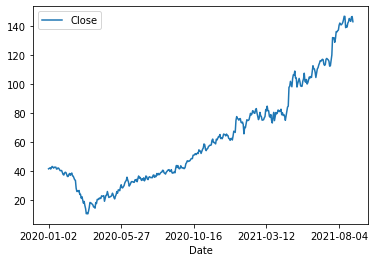

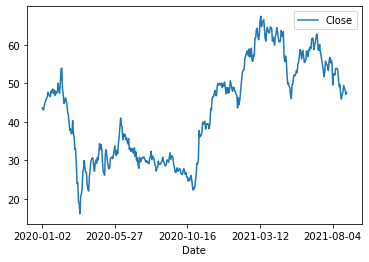

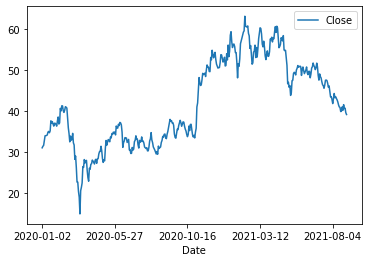

In [40]:
grouped[['Date', 'Close']].plot(x='Date', y='Close')
plt.show()

----------